In [52]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

data = pd.read_csv("Datasets/brain_size.csv", sep=";", na_values=".")

In [53]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [54]:
femviq = data[data["Gender"] == "Female"]["VIQ"]

In [55]:
malviq = data[data["Gender"] == "Male"]["VIQ"]

In [56]:
stats.ttest_ind(femviq, malviq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [57]:
stats.ttest_ind(data[data["Gender"] == "Female"]["FSIQ"], data[data["Gender"] == "Male"]["FSIQ"])

Ttest_indResult(statistic=-0.4026724743703011, pvalue=0.6894456253897778)

In [58]:
stats.ttest_ind(data[data["Gender"] == "Female"]["PIQ"], data[data["Gender"] == "Male"]["PIQ"])

Ttest_indResult(statistic=-0.15980113150762698, pvalue=0.8738841403250049)

In [59]:
stats.ttest_ind(data[data["Gender"] == "Female"]["Weight"].dropna(), data[data["Gender"] == "Male"]["Weight"].dropna())

Ttest_indResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05)

In [60]:
stats.ttest_ind(data[data["Gender"] == "Female"]["Height"].dropna(), data[data["Gender"] == "Male"]["Height"].dropna())

Ttest_indResult(statistic=-6.280184459523685, pvalue=2.623667704653113e-07)

In [61]:
def average_same(col_name):
    fem =  data[data["Gender"] == "Female"][col_name].dropna()
    mal =  data[data["Gender"] == "Male"][col_name].dropna()
    if stats.ttest_ind(fem, mal).pvalue < 0.05:
        return False
    return True

In [62]:
print(average_same("FSIQ"))
print(average_same("VIQ"))
print(average_same("PIQ"))
print(average_same("Weight"))
print(average_same("Height"))

True
True
True
False
False


In [63]:
iris = pd.read_csv("Datasets/iris.csv", sep=",", na_values=".")

In [64]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [66]:
iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].std()

0.3524896872134512

In [67]:
iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].mean()

5.005999999999999

In [85]:
z_score = stats.norm.ppf(1-0.05/2)
z_score

1.959963984540054

In [88]:
print(iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].mean() + z_score * 0.3525 / np.sqrt(50))
print(iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].mean() - z_score * 0.3525 / np.sqrt(50))

5.103706219616652
4.908293780383347


In [89]:
def ci_z(data_sample, significant_level, sigma):
    z = stats.norm.ppf(1-significant_level/2)
    L = np.mean(data_sample) - z*sigma/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + z*sigma/np.sqrt(len(data_sample))
    return L, U
    
def ci_t(data_sample, significant_level):
    t = stats.t.ppf(1 - significant_level/2, len(data_sample)-1)
    L = np.mean(data_sample) - t*np.std(data_sample, ddof=1)/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + t*np.std(data_sample, ddof=1)/np.sqrt(len(data_sample))
    return L, U

In [90]:
print(ci_z(iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"], 0.05, 0.3525))
print(ci_t(iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"], 0.05))

(4.908293780383347, 5.103706219616652)
(4.905823539430868, 5.106176460569131)


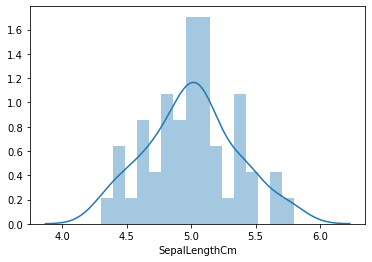

In [94]:
import seaborn as sns
sns.distplot(iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].dropna(), hist=True, kde=True, bins=16)

In [95]:
iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].mean() + 3*iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].std()

6.063469061640353

In [96]:
iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].mean() - 3*iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"].std()

3.948530938359646

In [97]:
import numpy as np

def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data_sample), np.std(data_sample)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed

In [100]:
q1 = np.percentile(iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"], 25)
q3 = np.percentile(iris[iris["Species"] == "Iris-setosa"]["SepalLengthCm"], 75)
IQR = q3-q1
print(q1 - 1.5 * IQR)
print(q3 + 1.5 * IQR)

4.199999999999999
5.800000000000001


In [101]:
def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    print(iqr)
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2101b8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a20fedc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a20fedbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2101ee10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1fcb29d0>],
 'means': []}

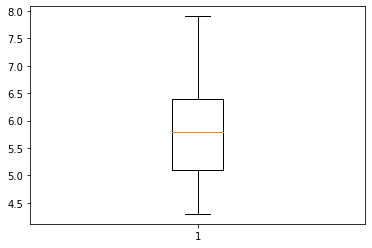

In [103]:
plt.boxplot(iris["SepalLengthCm"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cda7850>,
      dtype=object)

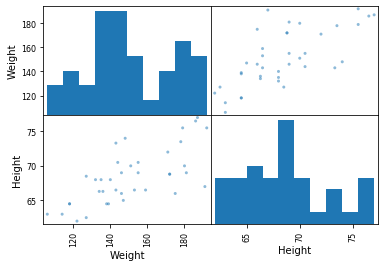

In [104]:
scatter_matrix(data[["Weight", "Height"]])